## ENG. SOFTWARE 2ESA / GLOBAL SOLUTION
### LUCCA SABATINI TAMBELLINI


In [138]:
#Instalações
%pip install pandas 
%pip install matplotlib.pyplot
%pip install seaborn
%pip install numpy

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot



Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [139]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [140]:
#Carregar o dataset
file_path = 'Cities1.csv'
data = pd.read_csv(file_path)
#display(data)

#### 1. Descrição do Projeto e das Variaveis

In [168]:
#1. Describe
print("Descrição do Projeto e das Variáveis:")
display(data.describe(include='all'))

#2. Tipo de Dados
print("Tipos de Dados:")
display(data.dtypes)

#3. Valores Nulos
print("Número de Valores Nulos:")
display(data.isnull().sum())

Descrição do Projeto e das Variáveis:


,City,Region,Country,AirQuality,WaterPollution
count,3963,3538,3963,3963.000000,3963.000000
unique,3796,1152,177,NaN,NaN
top,Albany,England,United States of America,NaN,NaN
freq,4,142,842,NaN,NaN
mean,NaN,NaN,NaN,62.253452,44.635372
std,NaN,NaN,NaN,30.944753,25.663910
min,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,37.686567,25.000000
50%,NaN,NaN,NaN,69.444444,50.000000
75%,NaN,NaN,NaN,87.500000,57.719393


Tipos de Dados:


City               object
Region             object
Country            object
AirQuality        float64
WaterPollution    float64
dtype: object

Número de Valores Nulos:


City                0
Region            425
Country             0
AirQuality          0
WaterPollution      0
dtype: int64

#### 2. Estatisticas Descritivas

In [167]:
#Exibe um describe de AirQuality e WaterPollution
estatisticas = data.describe()
print("Estatísticas Descritivas:")
display(estatisticas)

#Exibe um describe dos Paises
describe_country = data["Country"].describe()
print("Estatísticas Descritivas para a variável 'Country':")
display(describe_country)

#Exibe um describe das Cidades
describe_city = data["City"].describe()
print("\nEstatísticas Descritivas para a variável 'City':")
display(describe_city)

#Exibe um describe das Regioes
describe_region = data["Region"].describe()
print("\nEstatísticas Descritivas para a variável 'Region':")
display(describe_region)

Estatísticas Descritivas:


,AirQuality,WaterPollution
count,3963.000000,3963.000000
mean,62.253452,44.635372
std,30.944753,25.663910
min,0.000000,0.000000
25%,37.686567,25.000000
50%,69.444444,50.000000
75%,87.500000,57.719393
max,100.000000,100.000000


Estatísticas Descritivas para a variável 'Country':


count                         3963
unique                         177
top       United States of America
freq                           842
Name: Country, dtype: object


Estatísticas Descritivas para a variável 'City':


count       3963
unique      3796
top       Albany
freq           4
Name: City, dtype: object


Estatísticas Descritivas para a variável 'Region':


count        3538
unique       1152
top       England
freq          142
Name: Region, dtype: object

#### 3. Graficos

##### Comparação de 5 cidades aleatorias para AirQuality e WaterPollution

In [1]:
#Sortear 5 paises aleatorios só pra ver os graficos funcionando 
random_cities = data['City'].sample(5).values
random_cities_data = data[data['City'].isin(random_cities)]

print("\nCidades selecionadas:")
for city in random_cities:
    print(city)

NameError: name 'data' is not defined

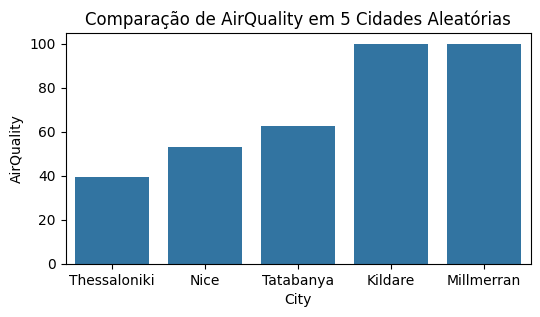

In [143]:
#Air Quality
plt.figure(figsize=(6, 3))
sns.barplot(x='City', y='AirQuality', data=random_cities_data)
plt.title('Comparação de AirQuality em 5 Cidades Aleatórias')
plt.show()

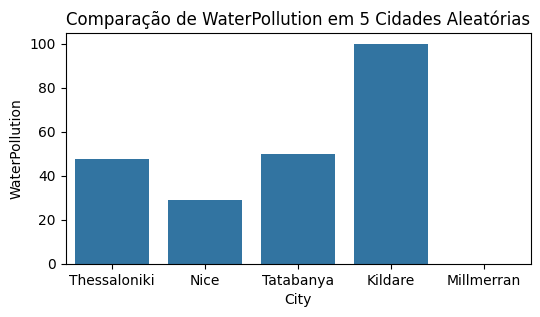

In [144]:
#Water Pollution
plt.figure(figsize=(6, 3))
sns.barplot(x='City', y='WaterPollution', data=random_cities_data)
plt.title('Comparação de WaterPollution em 5 Cidades Aleatórias')
plt.show()

##### Média de AirQuality e WaterPollution no Brasil, Estados Unidos, Japão e Russia

In [145]:
#Filtrar os países
countries = ['Brazil', 'United States of America', 'Japan', 'Russia']
country_data = data[data['Country'].isin(countries)]

country_means = country_data.groupby('Country')[['AirQuality', 'WaterPollution']].mean().reset_index()

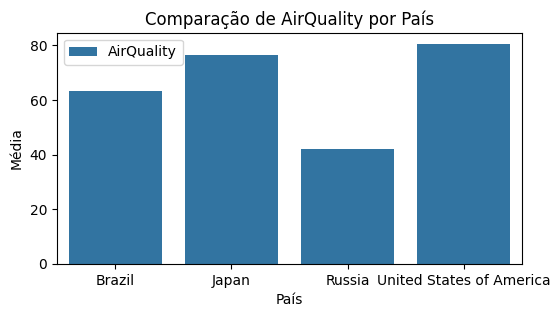

In [146]:
#Médias de AirQuality por país
plt.figure(figsize=(6, 3))
sns.barplot(x='Country', y='AirQuality', data=country_means, label='AirQuality')
plt.title('Comparação de AirQuality por País')
plt.xlabel('País')
plt.ylabel('Média')
plt.legend()
plt.show()

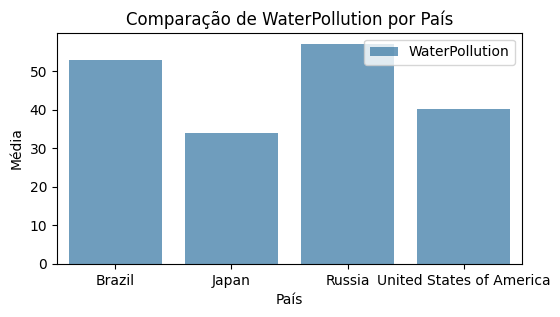

In [147]:
#Médias de WaterPollution por país
plt.figure(figsize=(6, 3))
sns.barplot(x='Country', y='WaterPollution', data=country_means, label='WaterPollution', alpha=0.7)
plt.title('Comparação de WaterPollution por País')
plt.xlabel('País')
plt.ylabel('Média')
plt.legend()
plt.show()

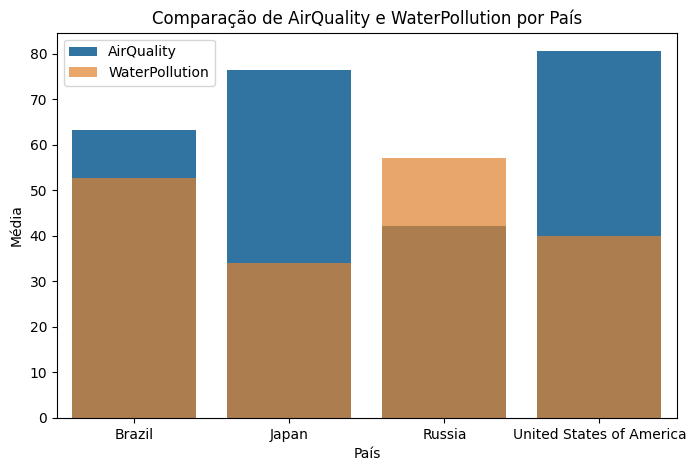

In [148]:
#Os dois graficos e os quatro paises juntos 
plt.figure(figsize=(8, 5))
sns.barplot(x='Country', y='AirQuality', data=country_means, label='AirQuality')
sns.barplot(x='Country', y='WaterPollution', data=country_means, label='WaterPollution', alpha=0.7)
plt.title('Comparação de AirQuality e WaterPollution por País')
plt.xlabel('País')
plt.ylabel('Média')
plt.legend()
plt.show()

##### Cidade com melhor qualidade de Ar e Água

In [160]:
#Cidades com melhor qualidade do ar e água
best_air_quality_cities = data.nlargest(5, 'AirQuality')['City']
best_water_quality_cities = data.nlargest(5, 'WaterPollution')['City']

print("\nCidades com melhor qualidade do ar:")
print(best_air_quality_cities.to_list())

print("\nCidades com melhor qualidade da água:")
print(best_water_quality_cities.to_list())

# Correlação entre qualidade do ar e poluição da água
correlation1 = data['AirQuality'].corr(data['WaterPollution'])
print(f"\nCorrelação entre qualidade do ar e poluição da água: {correlation1:.2f}")


Cidades com melhor qualidade do ar:
['Vaduz', 'Pskov', 'Veliky Novgorod', 'L?beck', 'Hagen']

Cidades com melhor qualidade da água:
['Nowy Sacz', 'Cagayan de Oro', 'Cherepovets', 'Niamey', 'Freetown']

Correlação entre qualidade do ar e poluição da água: -0.45


##### Paises com melhor qualidade de Ar e Água

In [161]:
#Paises com melhor qualidade do ar e água
best_air_quality_country = data.nlargest(5, 'AirQuality')['Country']
best_water_quality_country = data.nlargest(5, 'WaterPollution')['Country']

print("\nCidades com melhor qualidade do ar:")
print(best_air_quality_country.to_list())

print("\nCidades com melhor qualidade da água:")
print(best_water_quality_country.to_list())

# Correlação entre qualidade do ar e poluição da água
correlation2 = data['AirQuality'].corr(data['WaterPollution'])
print(f"\nCorrelação entre qualidade do ar e poluição da água: {correlation2:.2f}")


Cidades com melhor qualidade do ar:
['Liechtenstein', 'Russia', 'Russia', 'Germany', 'Germany']

Cidades com melhor qualidade da água:
['Poland', 'Philippines', 'Russia', 'Niger', 'Sierra Leone']

Correlação entre qualidade do ar e poluição da água: -0.45


##### Média de qualidade do Ar e da Água dos Paises

In [180]:
#Calcular a média de qualidade do ar e da água de todos os paises
average_air_quality = data.groupby("Country")["AirQuality"].mean()
average_water_quality = data.groupby("Country")["WaterPollution"].mean()

#Exibir as médias
print("Média de Qualidade do Ar por País:")
print(average_air_quality)

print("\nMédia de Poluição da Água por País:")
print(average_water_quality)

Média de Qualidade do Ar por País:
Country
Afghanistan    37.213694
Albania        51.873625
Algeria        57.607466
Andorra        43.750000
Angola         15.000000
                 ...    
Venezuela      36.514509
Vietnam        44.557443
Yemen          39.583333
Zambia         45.833333
Zimbabwe       45.329670
Name: AirQuality, Length: 177, dtype: float64

Média de Poluição da Água por País:
Country
Afghanistan    53.440657
Albania        57.834201
Algeria        50.623043
Andorra        25.000000
Angola         81.250000
                 ...    
Venezuela      78.549637
Vietnam        65.526918
Yemen          85.416667
Zambia         80.769231
Zimbabwe       74.107143
Name: WaterPollution, Length: 177, dtype: float64


Média de Qualidade do Ar para todos os países: 62.25345173956421
Média de Poluição da Água para todos os países: 44.63537214186172


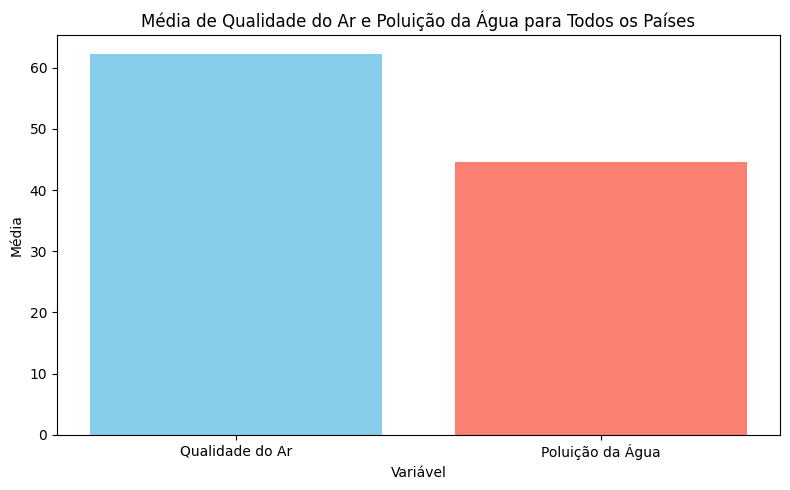

In [178]:
#Média de qualidade do ar e da água por país
average_air_quality = data["AirQuality"].mean()
average_water_quality = data["WaterPollution"].mean()

#Exibir em texto
print("Média de Qualidade do Ar para todos os países:", average_air_quality)
print("Média de Poluição da Água para todos os países:", average_water_quality)

#Exibir em grafico
plt.figure(figsize=(8, 5))
plt.bar(["Qualidade do Ar", "Poluição da Água"], [average_air_quality, average_water_quality], color=["skyblue", "salmon"])
plt.xlabel("Variável")
plt.ylabel("Média")
plt.title("Média de Qualidade do Ar e Poluição da Água para Todos os Países")
plt.tight_layout()
plt.show()